In [13]:
import glacierml as gl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
pd.set_option('display.max_columns',None)

In [14]:
df = gl.coregister_data('4')
df = df.drop(df[df['RGIId'].duplicated(keep = False) == True].index)
df = df.sample(frac = 1,random_state = 0)
df = df.reset_index().drop('index', axis = 1)

model_path = os.path.join(
    '/data/fast1/glacierml/models/LOO/' ,'rgi_est_raw.pkl'
)
RGI = pd.read_pickle(model_path) 
rgi_list = list(df)[:-1]
rgi_list.append('RGIId')
old_index = df.index.to_list()
df = pd.merge(df,RGI,how = 'inner', on = rgi_list)
print(df)
#### Add Farinotti mean thickness estimates ####
ref_pth = '/data/fast1/glacierml/data/reference_thicknesses/'
ref = pd.DataFrame()
for file in os.listdir(ref_pth):
    if 'Farinotti' in file:
        file_reader = pd.read_csv('reference_thicknesses/' + file)
        ref = pd.concat([ref, file_reader], ignore_index = True) 
ref = ref.rename(columns = {
     'Farinotti Mean Thickness':'FMT',
})
ref = ref[[
     'FMT',
     'RGIId',
]]

df = pd.merge(df, ref, how = 'inner', on = 'RGIId')
cols = []
for i in range(273):
    cols.append(i)
# cols = df.sort_values('Thickness', ascending = True).index
df = df.sort_values('Thickness', ascending = True)

              RGIId     CenLat     CenLon  Slope  Zmin  Zmed  Zmax    Area   
0    RGI60-13.05403  44.583903  79.475803   19.1  3258  3497  3751   1.595  \
1    RGI60-17.12714 -38.711200 -71.740500   14.4  1783  2167  3059   6.985   
2    RGI60-13.05579  44.885745  79.283745   14.3  3120  3309  3555   2.652   
3    RGI60-10.01815  49.825989  87.506485   20.0  2766  3015  3322   1.704   
4    RGI60-11.01024  46.765300  10.895100   13.7  3064  3353  3485   0.839   
..              ...        ...        ...    ...   ...   ...   ...     ...   
268  RGI60-17.01108 -34.792300 -70.286500   19.6  3221  3828  4396   3.151   
269  RGI60-11.02801  45.956600   7.457320   13.7  2477  3022  3748  11.614   
270  RGI60-10.01838  49.846458  87.624100   22.5  2940  3121  3476   0.814   
271  RGI60-07.00503  78.907800  11.695100   13.2    55   284   619   4.637   
272  RGI60-11.00797  46.851500  10.105400   17.7  2403  2910  3109   2.354   

     Aspect  Lmax  Thickness         GLIMSId   BgnDate   EndDat

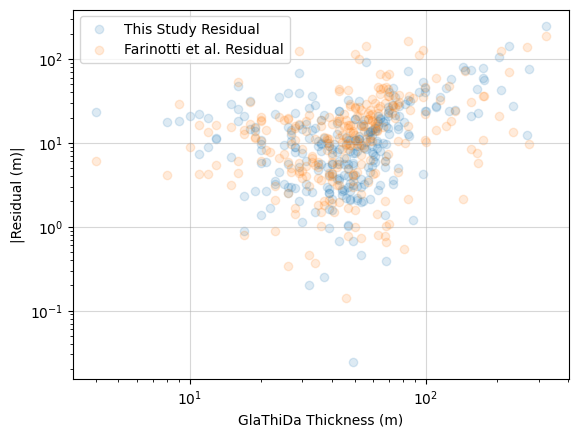

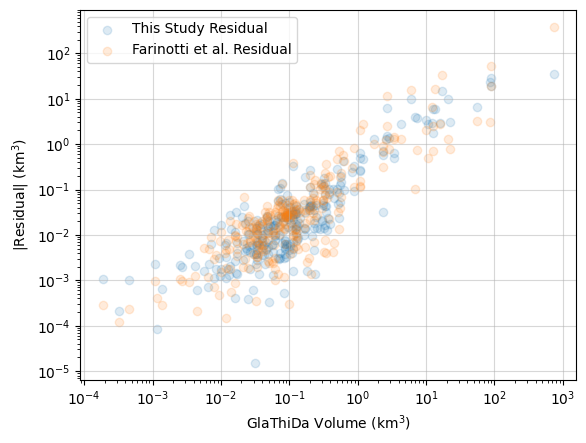

In [15]:
x = df['Thickness']
y = np.mean(df[cols],axis = 1)
z = df['FMT']
plt.scatter(
    x,abs(y-x),alpha = 0.15,label = 'This Study Residual'
)
plt.scatter(
    x,abs(z-x),alpha = 0.15,label = 'Farinotti et al. Residual'
)
# plt.plot(
#     (x.min(),x.max()),
#     (0,0),'k-'
# )
# plt.plot(
#     (x.min(),x.max()),
#     (-1,-1),'k--'
# )
# plt.plot(
#     (x.min(),x.max()),
#     (1,1),'k--'
# )
plt.xlabel('GlaThiDa Thickness (m)')
plt.ylabel('|Residual (m)|')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.grid(alpha = 0.5)
plt.show()

x = (df['Thickness'] / 1e3) * df['Area']
y = (np.mean(df[cols],axis = 1) / 1e3) * df['Area']
z = (df['FMT'] / 1e3) * df['Area']
plt.scatter(
    x,abs(y-x),alpha = 0.15,label = 'This Study Residual'
)
plt.scatter(
    x,abs(z-x),alpha = 0.15,label = 'Farinotti et al. Residual'
)
plt.plot(
    (x.min(),x.max()),
    (0,0),'k--'
)
plt.xlabel('GlaThiDa Volume (km$^3$)')
plt.ylabel('|Residual| (km$^3$)')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.grid(alpha = 0.5)

In [4]:
df

,RGIId,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Thickness,GLIMSId,BgnDate,EndDate,O1Region,O2Region,Status,Connect,Form,TermType,Surging,Linkages,Name,region,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,FMT
267,RGI60-11.03251,47.571169,12.866638,48.6,2259,2352,2446,0.047,19,100,4.0,G012867E47571N,20099999,-9999999,11,1,0,0,0,0,9,9,Blaueis 2,11,29.690220,28.452770,28.732664,28.659533,29.745586,29.007011,28.379280,29.915033,33.970367,29.373737,29.487375,29.140368,29.539970,30.054155,30.145678,29.050949,28.374115,29.459728,29.373522,29.000776,34.293919,29.467041,33.514778,35.690197,33.610222,30.963268,34.259586,35.093212,36.999210,35.122364,37.247231,31.536240,38.394535,33.481266,34.860489,37.356514,29.750729,32.532940,34.482796,22.531271,27.596947,34.798878,30.065279,37.616283,37.159573,38.417488,39.031708,38.337711,38.399590,22.959728,34.352188,39.635746,34.999344,38.307835,34.210743,35.849792,34.376125,35.414379,29.317844,28.032623,32.813587,36.518127,32.000580,21.698597,33.860958,31.395742,33.897507,32.017292,35.174313,30.342030,34.079346,33.199257,31.565758,32.402248,26.881330,39.994270,38.569370,35.527153,34.708694,39.251919,35.146015,32.942173,29.391865,30.528267,30.524580,29.897999,36.198532,36.276756,33.844788,34.016075,30.592518,38.115005,23.762918,32.351093,36.397251,31.347393,34.844627,37.996571,30.951481,29.123465,29.713787,35.031761,33.565590,36.810188,23.069603,22.616961,33.797024,33.454166,36.199356,30.082394,30.430361,22.645397,33.917000,20.339365,32.394138,25.211826,31.051306,24.335924,32.447140,20.074402,31.148340,26.781055,34.084297,33.885632,22.926512,31.452869,32.005535,31.965391,27.215256,30.994635,24.581533,29.810419,29.598747,27.963036,32.401413,27.983561,28.145311,28.787474,28.795122,29.556532,25.663078,25.908855,28.978382,24.245525,23.591394,22.606203,22.558985,21.207552,22.000244,22.732983,24.397242,24.124445,22.853382,25.330219,22.597868,23.642385,21.951992,24.676634,21.341190,21.308800,21.585073,21.126898,21.329140,22.778894,20.097303,26.724552,22.415224,26.293436,22.229252,21.264475,25.795273,23.480339,23.341173,22.723442,19.562876,21.342449,21.415253,23.984222,25.867201,19.007366,18.821825,21.388649,20.761757,25.266516,22.155663,23.464773,22.779814,22.974794,22.957798,23.204031,22.983747,22.728973,22.268496,26.333904,23.928953,23.760410,24.611601,24.591106,24.025381,21.634159,24.554241,23.187695,21.638998,21.367491,22.665733,23.500277,22.990055,16.700369,24.288284,21.155115,23.714003,17.906048,19.438946,20.339804,21.291765,17.490757,20.214361,21.226274,19.376556,23.479567,21.991684,25.727745,23.007568,24.175604,23.470922,23.562300,21.955585,21.978394,22.726830,22.301670,23.212210,21.147528,23.244253,23.606880,22.535347,21.918507,21.816010,19.187492,24.001261,22.712973,19.831169,21.506245,21.357851,23.834555,17.736443,21.968124,23.296167,22.050219,22.341068,21.720047,25.160563,23.130445,22.528852,23.501530,21.174543,20.638283,24.375401,22.970362,23.811243,21.635883,24.122938,21.428389,22.973280,21.454330,23.162437,21.117630,24.820679,23.678825,22.730534,19.710520,22.075

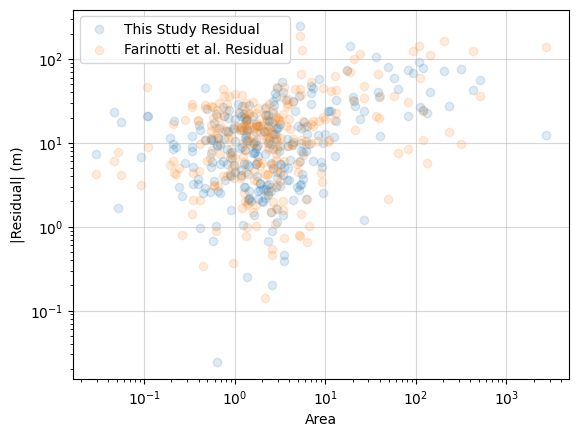

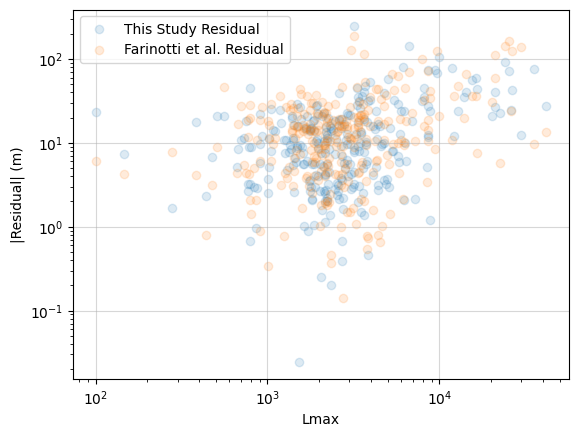

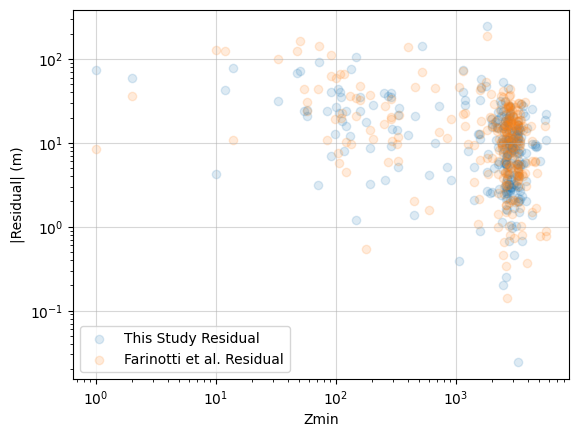

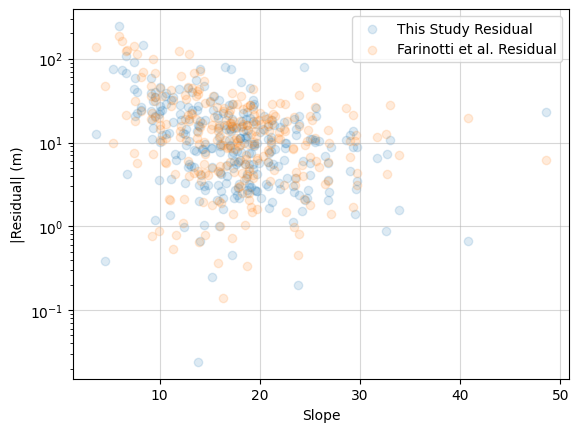

In [10]:
feat_list = ['Area','Lmax','Zmin','Slope']
for i in feat_list:
    
    x = df['Thickness']
    y = np.mean(df[cols],axis = 1)
    z = df['FMT']
    plt.scatter(
        df[i],abs(y-x),alpha = 0.15,label = 'This Study Residual'
    )
    plt.scatter(
        df[i],abs(z-x),alpha = 0.15,label = 'Farinotti et al. Residual'
    )
    plt.ylabel('|Residual| (m)')
    plt.legend()
    plt.yscale('log')
    if i != 'Slope':
        plt.xscale('log')
    plt.xlabel(i)

    plt.grid(alpha = 0.5)
    plt.show()


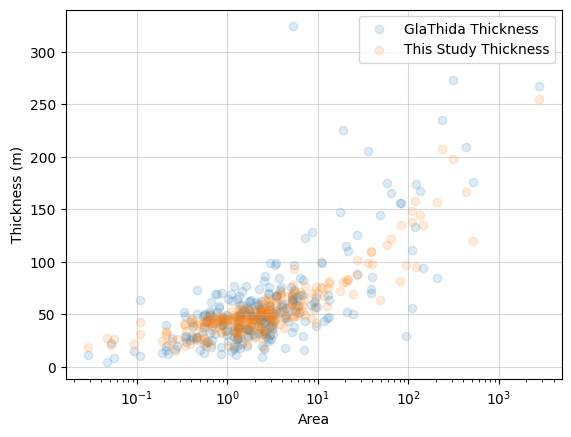

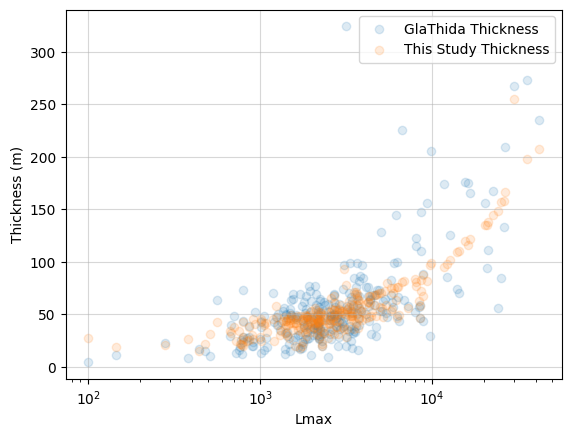

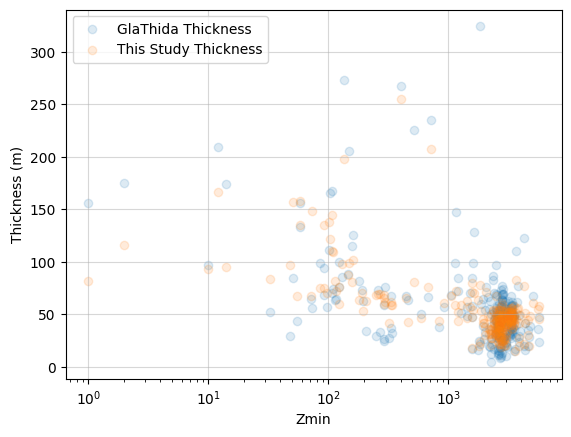

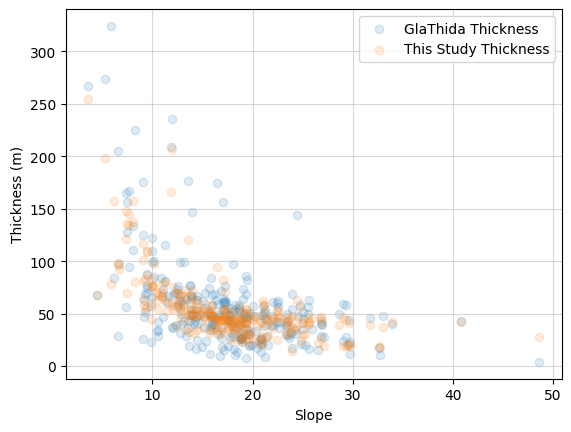

In [8]:
feat_list = ['Area','Lmax','Zmin','Slope']
for i in feat_list:
    
    x = df['Thickness']
    y = np.mean(df[cols],axis = 1)
    z = df['FMT']
    plt.scatter(
        df[i],x,alpha = 0.15,label = 'GlaThida Thickness'
    )
    plt.scatter(
        df[i],y,alpha = 0.15,label = 'This Study Thickness'
    )
    plt.ylabel('Thickness (m)')
    plt.legend()
#     plt.yscale('symlog')
    if i != 'Slope':
        plt.xscale('log')
    plt.xlabel(i)

    plt.grid(alpha = 0.5)
    plt.show()
